In [1]:
import pandas as pd
import numpy as np
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rawdata/house_data.csv")

## Feature description
- **id** - Unique id for each home sold  
- **date** - Date of the home sold  
- **price** - Price of each home sold  
- **bedrooms** - Number of bedrooms  
- **bathrooms** - Number of bathrooms  
- **sqft_living** - Square footage of the apartment's interior living space  
- **sqft_lot** - Square footage of the land space  
- **floors** - Number of floors  
- **waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not  
- **view** - An index from 0 to 4 of how good the view of the property was  
- **condition** - An index from 1 to 5 on the condition of the apartment  
- **grade** - An index from 1 to 13, where 1–3 falls short of building construction and design, 7 has an average level, and 11–13 have a high quality level of construction and design  
- **sqft_above** - Square footage of the interior housing space that is above ground level  
- **sqft_basement** - Square footage of the interior housing space that is below ground level  
- **yr_built** - The year the house was initially built  
- **yr_renovated** - The year of the house's last renovation  
- **zipcode** - Zipcode area the house is in  
- **lat** - Latitude  
- **long** - Longitude  
- **sqft_living15** - Square footage of interior living space for the nearest 15 neighbours  
- **sqft_lot15** - Square footage of the land lots of the nearest 15 neighbours  


In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df = df.drop(columns=["id", "date"])
# def remove_outliers_iqr(df, column):
#     Q1 = df[column].quantile(0.25)
#     Q3 = df[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# for col in [ 'bedrooms', 'bathrooms', 'sqft_living', ]:
#     df = remove_outliers_iqr(df, col)

df.shape

(21613, 19)

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [7]:
df.isnull().sum()
df.nunique()

price            4028
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

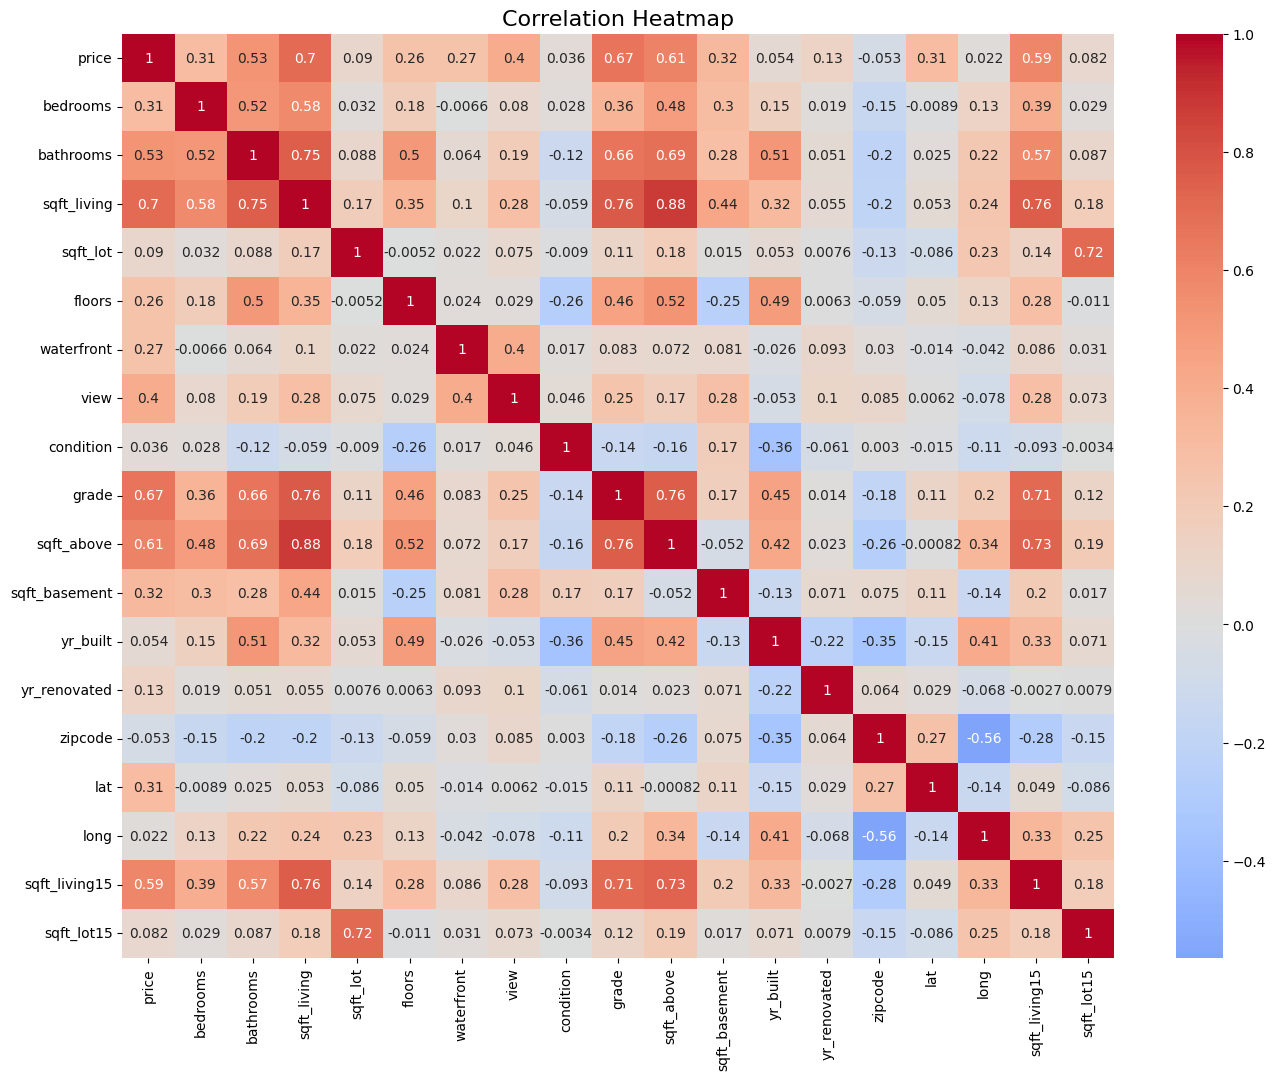

In [8]:
plt.figure(figsize=(16, 12))  # Adjust width and height as needed
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

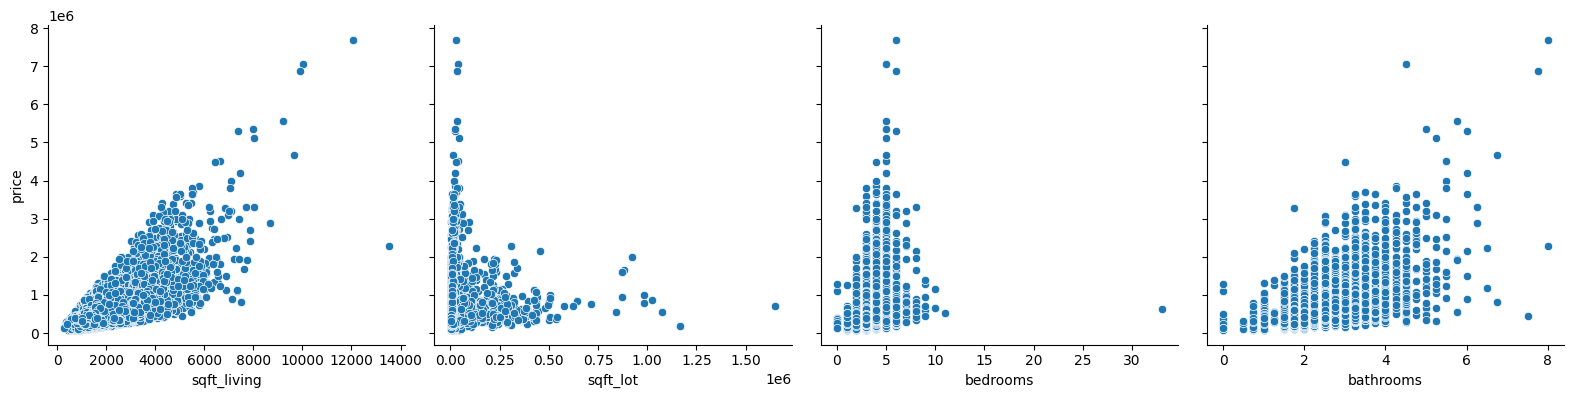

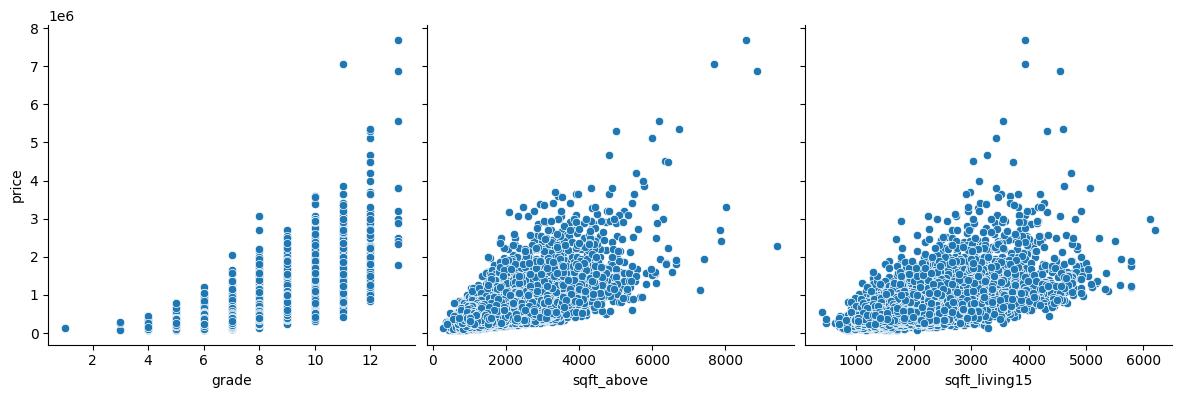

In [9]:
sns.pairplot(df, x_vars=["sqft_living", "sqft_lot", "bedrooms",  "bathrooms" ],  y_vars=['price'],  
             height=4 , kind="scatter" ,aspect=1, diag_kind="kde")
sns.pairplot(df, x_vars=["grade" , "sqft_above" , "sqft_living15"],  y_vars=['price'],  
             height=4 , kind="scatter" ,aspect=1, diag_kind="kde")

# Splitting data

In [10]:
from sklearn.model_selection import train_test_split 
X = df.drop(columns=["price"], axis=1)
Y = df[["price"]]
print(df.shape)
x_train , x_test , y_train , y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

(21613, 19)


# Normalizing Data

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"R-squared: {r2_score(y_test, y_pred)}")

Mean Squared Error: 45173046132.79014
Mean Absolute Error: 127493.34208656968
R-squared: 0.7011904448878413


Text(0.5, 1.0, 'Linear Regression model Prediction vs Actual Prices')

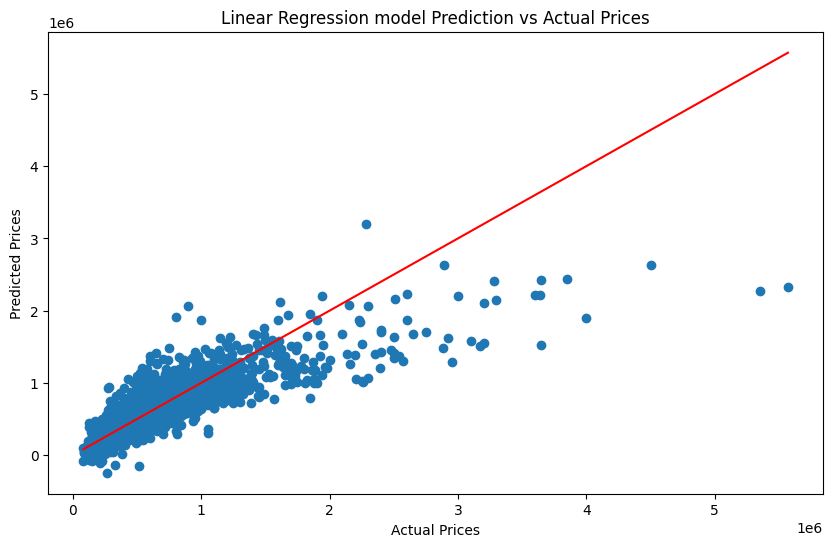

In [13]:
# plot the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title("Linear Regression model Prediction vs Actual Prices")

# Random Forest 

In [14]:
from sklearn.ensemble import RandomForestRegressor
RF_model=RandomForestRegressor(n_estimators=100, random_state=42)  # Create a Random Forest Regressor RF_model
RF_model = RF_model.fit(x_train,y_train.squeeze())  # Train /Fit the RF_model with feature and output
RF_y_pred=RF_model.predict(x_test)
print("MAE:", mean_absolute_error(y_test, RF_y_pred))
print("MSE:", mean_squared_error(y_test, RF_y_pred))
print("R^2 Score:", r2_score(y_test, RF_y_pred))
print("Accuracy score " , RF_model.score(x_test, y_test))


MAE: 72784.7417911338
MSE: 22107027433.379547
R^2 Score: 0.8537669783701961
Accuracy score  0.8537669783701961


Text(0.5, 1.0, 'Random Forest Regression Predictions vs Actual Prices')

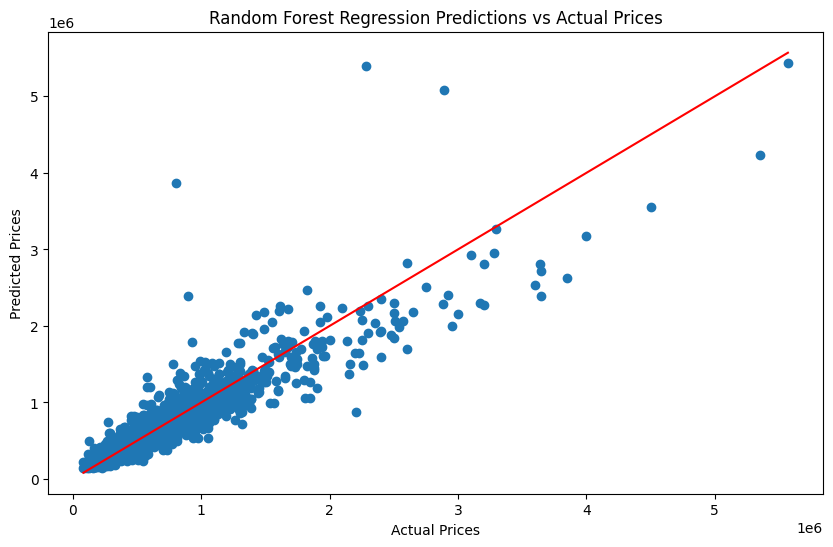

In [15]:
# plot the Random Forest regression line
plt.figure(figsize=(10, 6)) 
plt.scatter(y_test, RF_y_pred, alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Random Forest Regression Predictions vs Actual Prices')

# XG Boost

In [16]:
from xgboost import XGBRegressor

xgb_model  = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(x_train, y_train)
xgb_y_pred = xgb_model.predict(x_test)
print("XGBoost MAE:", mean_absolute_error(y_test, xgb_y_pred))
print("XGBoost MSE:", mean_squared_error(y_test, xgb_y_pred))
print("XGBoost R^2 Score:", r2_score(y_test, xgb_y_pred))

XGBoost MAE: 70312.4765625
XGBoost MSE: 18718803968.0
XGBoost R^2 Score: 0.8761793375015259


Text(0.5, 1.0, 'XGBoost Regression Predictions vs Actual Prices')

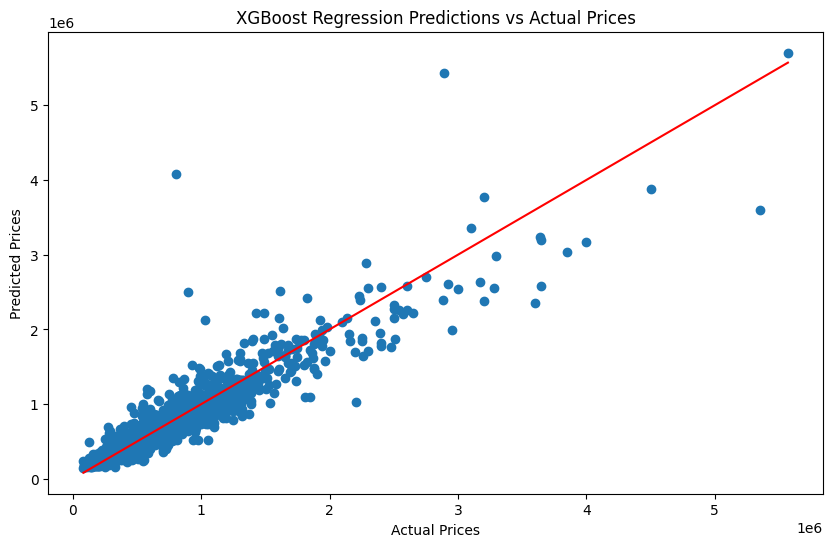

In [17]:
# plot the XGBoost regression line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, xgb_y_pred, alpha=1)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('XGBoost Regression Predictions vs Actual Prices')

# saving the model


In [18]:
# the best model from the above is XGBoost
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')
# save scaler 
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [19]:
# testing model 
model  = joblib.load('xgb_model.pkl')
test_data = pd.DataFrame({
    'bedrooms': [4],
    'bathrooms': [4.5],
    'sqft_living': [5420],
    'sqft_lot': [101930],
    'floors': [1],
    'waterfront': [0],
    'view': [0],
    'condition': [3],
    'grade': [11],
    'sqft_above': [3890],
    'sqft_basement': [1530],
    'yr_built': [2001],
    'yr_renovated': [0],
    'zipcode': [98053],
    'lat': [47.6561],
    'long': [-122.005],
    'sqft_living15': [4760],
    'sqft_lot15': [101930]
})
test_data = scaler.transform(test_data)
prediction_results = model.predict(test_data)
print(f"Predicted price for the test data: {prediction_results[0]:.2f}")

Predicted price for the test data: 1345524.12
